## • DOMAIN: Botanical research
## • CONTEXT: 
####    University X is currently undergoing some research involving understanding the characteristics of  plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo
## • DATA DESCRIPTION: 
####    The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data
## • PROJECT OBJECTIVE: 
#### University’s management require an automation which can create a classifier capable of determining a plant's species from a photo
Steps and tasks:
1. Import the data. Analyse the dimensions of the data. Visualise the data.
2. Design, train tune and test the best AIML image classifier model using:
• Supervised learning algorithms 
• Neural networks 
• CNN
3. Compare the results from the above step along with your detailed observations on the best performing algorithm and 
why/how it outperforms other algorithms in this case.
4. Pickle the best performing model.
5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained 
image classifier model to predict the class

# <span style='color :steelblue' >Import data :</span>

In [24]:
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import h5py
from matplotlib import pyplot as plt
%matplotlib inline
import os.path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
import cv2 # IMAGE PROCESSING - OPENCV
from sklearn.datasets import load_files
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
# GLOBAL VARIABLES
scale = 70
seed = 7
image_size = 256
target_size = (256, 256)
batch_size = 32

In [2]:
Filepath = "C://GreatLearning//DeepLearning//CNN//project//Plant Seedling Classification Data-20210718T062615Z-001.zip"
extractPath= "C://GreatLearning//DeepLearning//CNN//project"

In [3]:
# Extract the files from dataset to temp_train and temp_test folders (as the dataset is a zip file.)
from zipfile import ZipFile
with ZipFile(Filepath, 'r') as zip:
    zip.extractall(extractPath)
path="C://GreatLearning//DeepLearning//CNN//project//Part-1 - Plant Seedling Classification Data//train/"

# <span style='color :steelblue' >Analyse the dimensions of the data.</span>

In [4]:
labels=[]
print(path)
count=0
for dirname,_,filenames in os.walk(path):
    d=dirname.split("/")
    for file in filenames:
        count+=1
    if(len(d)==10):
        continue
    labels.append(d[13])
labels=np.array(labels)
print(labels , count)

C://GreatLearning//DeepLearning//CNN//project//Part-1 - Plant Seedling Classification Data//train/
['' 'Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet'] 4767


- **As our dataset has different sizes of images, so we are going to resize the images. Reading the data and resizing them are performed in a single step as in below code:** 

In [6]:
path_to_images = "C:/GreatLearning/DeepLearning/CNN/project/Part-1 - Plant Seedling Classification Data/train/*/*"
images = glob(path_to_images)

train_images = []
train_labels = []

for img in images:
    train_images.append(cv2.resize(cv2.imread(img), (256, 256)))
    train_labels.append(img.split('\\')[-2])
train_X = np.asarray(train_images)
#print(train_labels)
train_Y = pd.DataFrame(train_labels)

In [7]:
print(train_X.shape)
print(train_Y.shape)

(4767, 256, 256, 3)
(4767, 1)


In [8]:
train_Y[0].unique()

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

- **As per above,labels are strings and these are hard to process. So we’ll convert these labels into a binary classification.**


In [9]:
# Converting labels to numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_Y[0])
encoded_labels = encoder.transform(train_Y[0])
categorical_labels = tf.keras.utils.to_categorical(encoded_labels)
encoder.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

# <span style='color :steelblue' >Visualise the data.</span>

Text(0.5, 1.0, 'Loose Silky-bent')

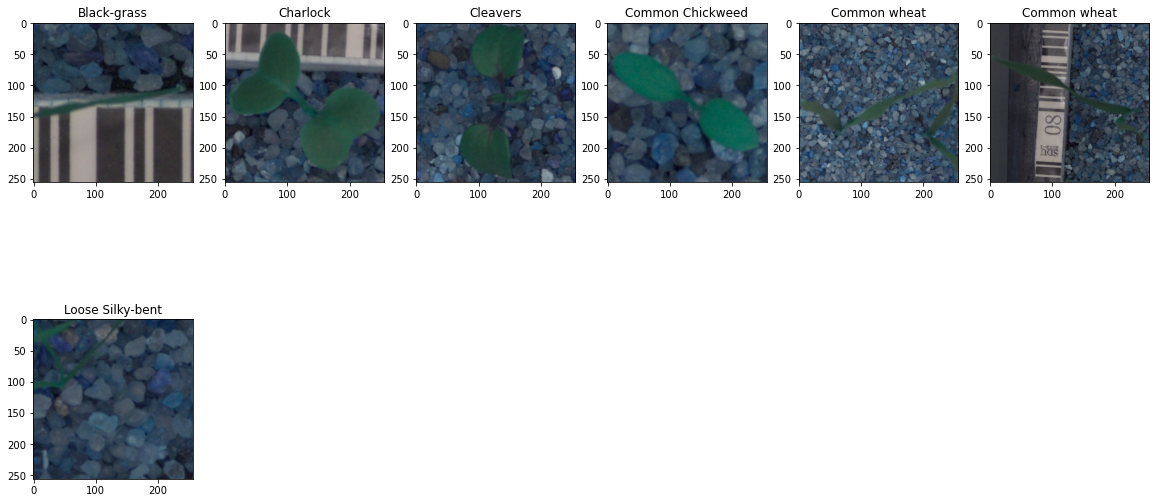

In [10]:
train_Y[0].value_counts()
f = plt.figure(figsize=(20, 20))

f.add_subplot(2, 6, 1)
plt.imshow(train_X[0])
plt.title(train_Y[0][0])

f.add_subplot(2, 6, 2)
plt.imshow(train_X[496])
plt.title(train_Y[0][496])

f.add_subplot(2, 6, 3)
plt.imshow(train_X[759])
plt.title(train_Y[0][759])
 
f.add_subplot(2, 6, 4)
plt.imshow(train_X[1370])
plt.title(train_Y[0][1370])

f.add_subplot(2, 6, 5)
plt.imshow(train_X[1755])
plt.title(train_Y[0][1755])

f.add_subplot(2, 6, 6)
plt.imshow(train_X[1685])
plt.title(train_Y[0][1685])

f.add_subplot(1, 6, 1)
plt.imshow(train_X[2409])
plt.title(train_Y[0][2409])



In [11]:
idg_sample = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    vertical_flip=True
                    )
sample_data = idg_sample.flow_from_directory('C://GreatLearning//DeepLearning//CNN//project//Part-1 - Plant Seedling Classification Data//train/',
                                                    target_size=target_size,
                                                    subset='training',
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True,
                                                    seed=1,
                                                    classes = classes
                                                )

Found 4767 images belonging to 12 classes.


- **From the extracted Dataset we have found 4767 images belonging to 12 classes.**
- **Individual classes counts have been displayed in below PI chart**

<AxesSubplot:ylabel='0'>

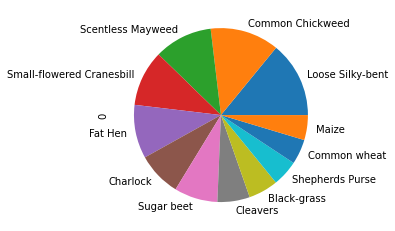

In [12]:
train_Y[0].value_counts().plot(kind='pie')

- **Below we are defining our model and splitting our dataset** 
- **In this step, we are going to split the training dataset for validation. We are using the train_test_split() function from scikit-learn.**
- **Here we are splitting the dataset keeping the test_size=0.2. It means 20% of total data is used as testing data and the other 80% as training data.** 

In [13]:
x_train,x_test,y_train,y_test=train_test_split(train_X,categorical_labels,test_size=0.2,random_state=7)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3813, 256, 256, 3)
(954, 256, 256, 3)
(3813, 12)
(954, 12)


In [15]:
# Normalization of the Image Data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 

In [16]:
X_val,X_test_new,y_val,y_test_new = train_test_split(x_test,y_test,test_size=0.2,random_state=7,stratify=y_test)
print(X_val.shape)
print(y_val.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(763, 256, 256, 3)
(763, 12)
(191, 256, 256, 3)
(191, 12)


# <span style='color :steelblue' >Design, train tune and test the best AIML image classifier model using: • CNN</span>

In [17]:
#generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
#generator.fit(x_train)

- **Our dataset consists of images so we have deep neural network for the images.**
- **In this problem, we are going to use a convolutional neural network.**
- **This neural network will take images as input and it will provide the final output as a species value.**
- **We are randomly using 4 convolution layers and 3 fully connected layers.**
- **Also, We are using multiple functions like Sequential(), Conv2D(), Batch Normalization, Max Pooling, Dropout, and Flatting.**
- **I then use ‘Adam’ as my optimizer and since, there are 12 classes, I use, ‘Categorical_Crossentropy’, as my loss.**

#### We are using a convolutional neural network for training.

- *This model has 4 convolution layers.*
- *This model has 3 fully connected layers.*

In [18]:
np.random.seed(seed)
model = Sequential()
#Add 1st Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'))

#Add 2nd Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add 3rd Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add 4th Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Flatten the data
model.add(tf.keras.layers.Flatten())

#Add 1st dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Dropout
model.add(tf.keras.layers.Dropout(0.3))

#Add 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Dropout
model.add(tf.keras.layers.Dropout(0.3))

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 252, 252, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 124, 124, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0

- **Below code is to fit the CNN model onto our dataset so that model will get learn from the training dataset. This trained CNN model can be further used to get the final predictions on our testing dataset.**
- **I have used call back for early stopping purpose**

In [20]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

history = model.fit(x_train,y_train, epochs = 50, validation_data = (X_val,y_val),batch_size = 16,callbacks=[callback])

Epoch 1/50
239/239 [==============================] - 1731s 7s/step - loss: 2.2145 - accuracy: 0.3079 - val_loss: 8.3353 - val_accuracy: 0.1402
Epoch 2/50
239/239 [==============================] - 1796s 8s/step - loss: 1.4082 - accuracy: 0.5229 - val_loss: 6.7194 - val_accuracy: 0.1415
Epoch 3/50
239/239 [==============================] - 1793s 8s/step - loss: 1.1757 - accuracy: 0.6011 - val_loss: 1.9366 - val_accuracy: 0.3958
Epoch 4/50
239/239 [==============================] - 1792s 8s/step - loss: 1.0086 - accuracy: 0.6557 - val_loss: 1.2380 - val_accuracy: 0.6160
Epoch 5/50
239/239 [==============================] - 1785s 7s/step - loss: 0.8731 - accuracy: 0.7047 - val_loss: 1.9390 - val_accuracy: 0.4810
Epoch 6/50
239/239 [==============================] - 1778s 7s/step - loss: 0.7510 - accuracy: 0.7367 - val_loss: 1.3976 - val_accuracy: 0.5832


- **From the above we have observed train accuracy:73.67% and  validation accuracy 58%**

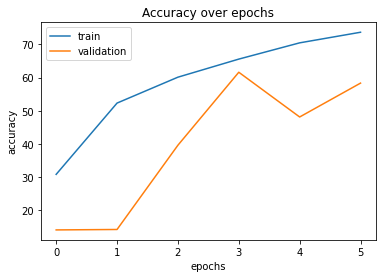

In [22]:
pd.DataFrame(history.history)
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [23]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

6/6 [==============================] - 10s 2s/step - loss: 1.4590 - accuracy: 0.5759
Test loss: 1.4590131044387817
Test accuracy: 0.5759162306785583


- **The validation Train accuracy : 58.32% and Test accuracy is nearly 58% which is nearly same.**

In [32]:
# save the model in h5 file. This will save in current working dir
model.save("seed_model_reg.h5")
model.save_weights('seed_model_reg_weights.h5')#using h5 extension
print("model saved!!!")

model saved!!!


In [33]:
# load the model
from tensorflow.keras.models import load_model
model_c =load_model('signal_model_reg.h5')

- **In the final part, we are getting our predictions on the testing dataset. Check the below code for getting the predictions using the trained model**

In [59]:
path_to_test = 'C://GreatLearning//DeepLearning//CNN//project//Seedling - Prediction-20210803T133707Z-001//Seedling - Prediction//*.png'
pics = glob(path_to_test)
testimages = []
tests = []
count=1
num = len(pics)
for i in pics:
    print(str(count)+'/'+str(num),end='r')
    tests.append(i.split('/')[-1])
    testimages.append(cv2.resize(cv2.imread(i),(scale,scale)))
    count = count + 1
testimages = np.asarray(testimages)
testimages.shape

1/1r

(1, 70, 70, 3)

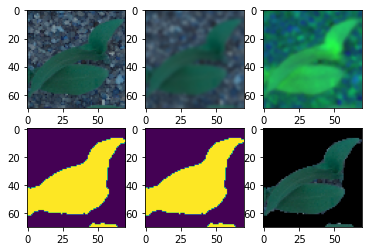

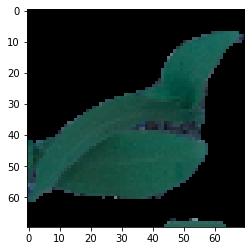

In [60]:
newtestimages = []
sets = []
getEx = True
for i in testimages:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    masking = np.zeros_like(i,np.uint8)
    masking[boolean] = i[boolean]
    newtestimages.append(masking)
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i)
        plt.subplot(2,3,2);plt.imshow(blurr)
        plt.subplot(2,3,3);plt.imshow(hsv)
        plt.subplot(2,3,4);plt.imshow(mask)
        plt.subplot(2,3,5);plt.imshow(boolean)
        plt.subplot(2,3,6);plt.imshow(masking)
        plt.show()
        getEx=False
newtestimages = np.asarray(newtestimages)
# OTHER MASKED IMAGES
plt.imshow(newtestimages[0])

In [64]:
# Normalization of the Image Data
newtestimages = newtestimages/ 255
predictions = model.predict(newtestimages)
preds = np.argmax(predictions, axis=1)
print(preds)
pred_str = encoder.classes_[preds]


final_predictions = {'file':tests, 'species':pred_str}
final_predictions = pd.DataFrame(final_predictions)
final_predictions.to_csv("C://GreatLearning//DeepLearning//CNN//project//submission.csv", index=False)

[4]
